In [ ]:
from autqec.automorphisms import *
from autqec.utils.qec import *
from autqec.utils.qiskit import *
from autqec.magma_interface import *
from autqec.ZX_dualities import *
from autqec.ZY_dualities import *
import pickle
from IPython.display import display

## [[5,1,3]] - 5 qubit perfect code

$$S = \langle XZZXI, IXZZX, XIXZZ, ZXIXZ \rangle$$

#### Define code

In [4]:
n = 5
k = 1
d = 3
stabs = ['XZZXI','IXZZX','XIXZZ','ZXIXZ']
H_symp = stabs_to_H_symp(stabs)
print(H_symp)

[[1 0 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 1 1 0]
 [1 0 1 0 0 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 0 1]]


#### Automorphism group generators from MAGMA

In [46]:
qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/',save_magma_commands = True)
filename = f'./auts_data/auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Run the commands on MAGMA online calculator.
Copy and save output as 'magma_output_n5k1d3.txt'

Aut Group Order:  360
Time:  0.01
No of aut gens:  6


In [47]:
auts = code_auts_dict['auts']
circuits = []
symp_mats = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    log_act = logical_circ_and_pauli_correct(H_symp,phys_circ)
    circ = log_act.run()
    circuits.append(circ)
    symp_mats.append(log_act.U_logical_act())

In [48]:
filename = f'./auts_data/symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(symp_mats, f)

## Circuits

Circuit 0
 Logical action: [('H', 1)]
 Physical circuit:


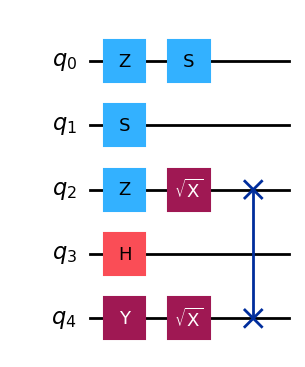

In [49]:
i = 0
print(f'Circuit {i}')
print(f' Logical action:',circuits[i][0])
print(f' Physical circuit:')
qc = construct_circuit(circuits[i][1], n)
qc.draw(output='mpl')

Circuit 0
 Logical action: [('H', 1)]
 Physical circuit:


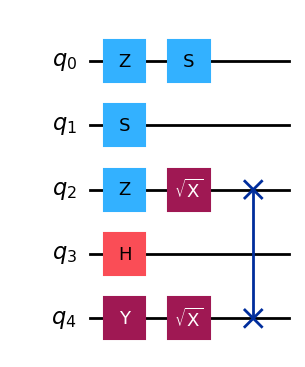

Circuit 1
 Logical action: []
 Physical circuit:


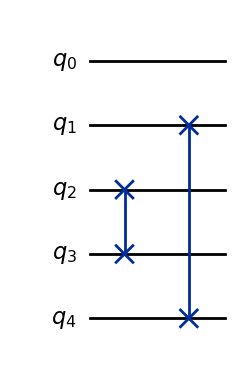

Circuit 2
 Logical action: []
 Physical circuit:


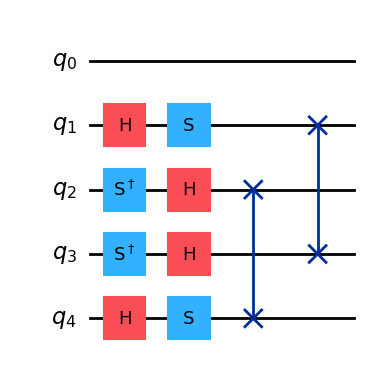

Circuit 3
 Logical action: [('H', 1), ('Xsqrt', 1)]
 Physical circuit:


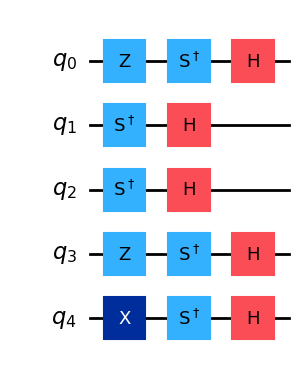

Circuit 4
 Logical action: [('S', 1), ('Xsqrt', 1)]
 Physical circuit:


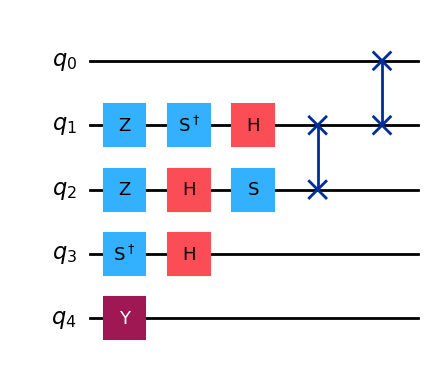

Circuit 5
 Logical action: []
 Physical circuit:


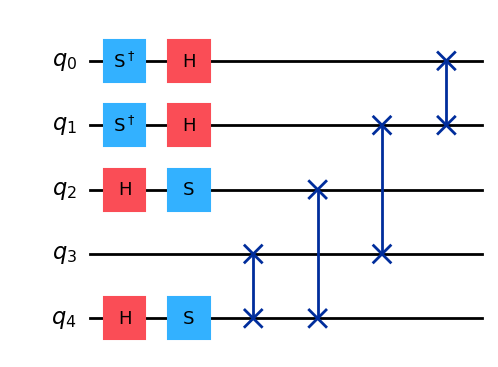

In [50]:
for i in range(len(circuits)):
    print(f'Circuit {i}')
    print(f' Logical action:',circuits[i][0])
    print(f' Physical circuit:')
    qc = construct_circuit(circuits[i][1], n)
    fig = qc.draw(output='mpl')
    display(fig)